In [2]:
import numpy as np
from numpy import ndarray
from sklearn.model_selection import KFold
import pandas as pd
from pandas import DataFrame, Series
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from bokeh.plotting import figure
import math
from scipy import stats
import os

### Load Data

In [3]:
data = pd.read_csv(".\\f1_45rmc_csv\\fs9_feature table.csv")
# xdata = data.drop(["target"],axis=1)  #extrat all PC as X data

ydata = data[["pIC50"]]
xdata = data.drop(["pIC50"],axis=1)

In [4]:
xdata.shape

(50, 9)

In [5]:
ydata.head()

,pIC50
0,0.476254
1,0.602060
2,1.527402
3,-0.219323
4,-0.421604


In [6]:
ydata.shape

(50, 1)

### Function to product MLR model with 100% data

In [7]:
def train_plot(X_data,y_data,pngname='trainplot.jpg') :
    """
    Show prediction training plot

    Returns
    -------
    None
    """
    x = X_data.values
    y = y_data.values
    pred_plotY = np.zeros_like(y)
    g_mlrr = LinearRegression()
    g_mlrr.fit(x,y)
    pred_plotY = g_mlrr.predict(x)
    #set the font style is Time New Roman:
    plt.rcParams['font.family'] = ['Times New Roman']
    # set the background color is white:
    plt.rcParams['axes.facecolor'] = "white"

    plt.figure(figsize=(12,8))
    #设置边框：
    bwith = 2.5 #边框宽度设置为2
    fig,ax = plt.subplots()
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)

    plt.ylabel("Predicted Y",fontsize=20)
    plt.xlabel("Actual Y",fontsize=20)
    ax.scatter(y,pred_plotY,color="#87CEFA")
    plt.plot([y.min() , y.max()] , [[y.min()],[y.max()]],"grey" )
    plt.plot([y.min(),y.max()] , [y.min()+1,y.max()+1],"grey",ls = "-." )
    plt.plot([y.min() , y.max()] , [y.min()-1,y.max()-1],"grey",ls = "-." )
    plt.tick_params(size=12,width=2, labelsize=20)
    
    # fix the tick in plot:
    plt.minorticks_on()
    plt.tick_params(axis="both", which="major", direction="out", width=1,length=10,color="black")
    plt.tick_params(axis="both", which="minor", direction="in", width=1, length=5)
    
    #fix the dot size in plot:
    size_train = []
    for i in y: size_train.append(55)
    paths = ax.collections[0]
    paths.set_sizes(size_train)
    
    # show the plot and save:
    plt.savefig(pngname,dpi=600)
    plt.show()

def mlr(xdata,ydata) :
    """
    c model information with result of multiple linear regression

    Returns
    -------
    None
    """
    x = xdata.values
    y = ydata.values
    mlr = LinearRegression()
    mlr.fit(x,y)
    print('Coefficients: ', mlr.coef_)
    print('Intercept: ',mlr.intercept_)
    #MSE
    print ("MSE: %.3f" % np.mean((mlr.predict(x) - y) ** 2))
    #print mean_squared_error(mlr.predict(x),y)
    print("RMSE: %.6f" % np.sqrt(mean_squared_error(mlr.predict(x),y)))
    # Explained variance score
    print('R^2: %.6f' % mlr.score(x, y))
    r_2 = mlr.score(x, y)
    return r_2

### Training plot

<Figure size 864x576 with 0 Axes>

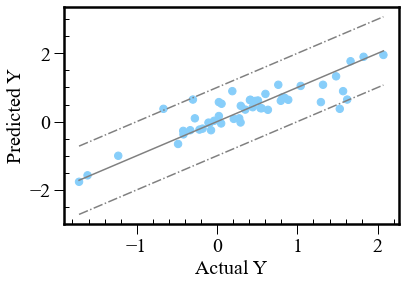

In [9]:
f= ".\\f1_45rmc_csv\\fs12_feature table.csv"

data = pd.read_csv(f)

ydata = data[["pIC50"]]
xdata = data.drop(["pIC50"],axis=1)

train_plot(xdata,ydata,pngname='TrainPlot-f12.jpg')

### Produce MLR model with 100% training set

In [13]:
folder = "E:\\jupyter_save_address\\QSAR\\f1_45rmc_csv\\"
R2score = ""
fid = 1
files = os.listdir(folder)
for f in files:
    if f[0:2] == "fs":
        data = pd.read_csv(folder+f)
        xdata = data.drop(["pIC50"],axis=1)  #extrat all PC as X data
        ydata = data[["pIC50"]]
        r_square = mlr(xdata,ydata)
        R2score += str(fid)+","+str(xdata.shape[1])+","+str(r_square)+"\n"
        fid+=1

# R2score
with open("mlrreport.csv","w") as f:
    f.write("fid,fnum,R-square\n")
    f.write(R2score)

Coefficients:  [[ 0.26974834 -0.97699547 -1.05404932 -2.38724958 -2.76206442  0.86113815
   3.14521184  0.66103887 -1.05355357]]
Intercept:  [2.05281033]
MSE: 0.272
RMSE: 0.521317
R^2: 0.587398
Coefficients:  [[ 0.44564808 -1.83682625  0.89052545 -1.63090229 -1.14508721 -0.02511204
   0.71923553  2.6961431   2.12319161]]
Intercept:  [-0.75587075]
MSE: 0.388
RMSE: 0.622855
R^2: 0.411020
Coefficients:  [[-3.1105977   2.63042133 -1.3530213  -1.34229397  3.28347821 -1.01876677
  -1.15584926  3.76317448 -0.56571751 -0.42935246 -1.11627362  0.76291664]]
Intercept:  [0.29283235]
MSE: 0.148
RMSE: 0.384750
R^2: 0.775257
Coefficients:  [[-1.58862681 -1.78623846 -3.03572892 -1.30528277 -0.85724251  0.45701635
   1.64503819  3.27335    -1.5950572 ]]
Intercept:  [3.28659752]
MSE: 0.268
RMSE: 0.517922
R^2: 0.592755
Coefficients:  [[ 0.43388712 -3.17592782  1.09593399 -1.92082584 -1.04541288  0.59590882
   1.95191391  3.12793636  2.55141272 -0.57008355  0.58206765 -0.62909945]]
Intercept:  [-0.836831

MSE: 0.258
RMSE: 0.507506
R^2: 0.608970
Coefficients:  [[-1.02223644  1.0777896  -4.04482059  0.58404687 -1.36187498  1.03211168
   1.27239619 -0.05267481  3.73527623 -0.48294915 -0.39260861 -1.08170147
  -0.48634009  3.16238956 -1.39379017 -3.41870523  0.97575173  0.6586751
  -0.17512446  0.53767399  0.33749575 -0.81354708 -0.18468523 -0.23669273
   1.11015637  1.69639005  0.24518715  1.0022872 ]]
Intercept:  [1.08041146]
MSE: 0.287
RMSE: 0.535924
R^2: 0.563952
Coefficients:  [[ 0.29245163 -0.58041117 -2.32812578  0.00846905 -1.16800228 -1.46522481
   0.66291032  0.53599194 -0.53491817  1.53186495  0.16373895 -0.53581702
  -0.89941803  0.0333653  -0.14498391  0.87188012  2.48875552 -2.75431125
   0.22818279  1.74244579  1.13308942]]
Intercept:  [2.87489454]
MSE: 0.324
RMSE: 0.568927
R^2: 0.508594
Coefficients:  [[ 1.48732902 -1.68591758 -1.89007532  1.5744913 ]]
Intercept:  [0.11847068]
MSE: 0.354
RMSE: 0.594887
R^2: 0.462725
Coefficients:  [[-1.63027292 -1.78650085  2.39777359  2.128

### Function for 5-k fold validation 

In [3]:
def k_fold(X_data,y_data,run=100,k=5) :
    """
    Repeat K-fold 'run' times and summary the best implementation.

    Parameters
    ----------
    X_data : pandas DataFrame , shape = (n_samples, n_features)
    y_data : pandas DataFrame , shape = (n_samples,)
    feature_set : list, set of features that make up model
    run : int, number of implementation
    k : int, k of 'K'-Fold

    Returns
    -------
    Model
    """
    gingerbreadman = []
    n=0
    while n < run :
        n = n+1
        Q2=[]
        R2 =[]
        coef = []
        intercept = []
        trainset_index=[]
        testset_index=[]
        x = X_data.values
        y =y_data.values
        kf = KFold(n_splits=k,shuffle=True)
        predY = np.zeros_like(y)
        for train,test in kf.split(x):
            scaler = MinMaxScaler()
            scaler.fit(x[train])
            xtrain = scaler.transform(x[train])
            xtest = scaler.transform(x[test])
            clf = LinearRegression()
            clf.fit(xtrain,y[train])
            predY[test] = clf.predict(xtest)
            rs = clf.score(xtrain,y[train])
            qs = clf.score(xtest,y[test])
            coe = clf.coef_
            inte = clf.intercept_
            Q2.append(qs)
            R2.append(rs)
            coef.append(coe)
            intercept.append(inte)
            trainset_index.append(train)
            testset_index.append(test)
        rmse = np.sqrt(mean_squared_error(predY,y))
        maxq2 = np.max(Q2)
        index = Q2.index(maxq2)
        mid = []
        mid.append(np.mean(np.array(Q2))) #ginger[0]
        mid.append(np.mean(np.array(R2))) #ginger[1]
        mid.append(rmse) #ginger[2]
        mid.append(coef[index]) #ginger[3]
        mid.append(intercept[index]) #ginger[4]
        mid.append(trainset_index[index])
        mid.append(testset_index[index])
        gingerbreadman.append(mid)

    gingerbreadman.sort()
    best =  gingerbreadman[-1]

    print('R^2CV mean: {:.6}'.format(best[1]))
    print('Q^2CV mean: {:.6}'.format(best[0]))
    print('RMSE CV : {:.6}'.format(best[2]))
    print('Model coeff = ',best[3])
    print('Model intercept = ',best[4])

  # the best result of the train set and test set:
    train_ind = best[5]
    test_ind = best[6]
    #print trainind,testind

    pred_plotY = np.zeros_like(y)
    g_mlr = LinearRegression()
    model=g_mlr.fit(x[train_ind],y[train_ind])

    #set the font style is Time New Roman:
    plt.rcParams['font.family'] = ['Times New Roman']
    # set the background color is white:
    plt.rcParams['axes.facecolor'] = "white"

    plt.figure(figsize=(12,8))
    #设置边框：
    bwith = 2.5 #边框宽度设置为2
    fig,ax = plt.subplots()
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    
    pred_plotY[train_ind] = g_mlr.predict(x[train_ind])
    pred_plotY[test_ind] = g_mlr.predict(x[test_ind])
    plt.ylabel("Predicted Y",fontsize=20)
    plt.xlabel("Actual Y",fontsize=20)
    ax.scatter(y[train_ind],pred_plotY[train_ind],color="#87CEFA")
    ax.scatter(y[test_ind],pred_plotY[test_ind],color="#FF4040",alpha = .8)
    plt.plot([y.min() , y.max()] , [[y.min()],[y.max()]],"grey" )
    plt.plot([y.min(),y.max()] , [y.min()+1,y.max()+1],"grey",ls = "-." )
    plt.plot([y.min() , y.max()] , [y.min()-1,y.max()-1],"grey",ls = "-." )
    plt.tick_params(size=12,width=2, labelsize=20)
    
    # fix the tick in plot:
    plt.minorticks_on()
    plt.tick_params(axis="both", which="major", direction="out", width=1,length=10,color="black")
    plt.tick_params(axis="both", which="minor", direction="in", width=1, length=5)
    
    #fix the dot size in plot:
    size_train = []
    for i in y[train_ind]: size_train.append(55)
    paths = ax.collections[0]
    paths.set_sizes(size_train)
    size_test = []
    for i in y[test_ind]: size_test.append(80)
    paths2 = ax.collections[1]
    paths2.set_sizes(size_test)
    
    # show the plot and save:
    plt.savefig('cvmplot_temp.jpg',dpi=600)
    plt.show()
    
    
    #get beta stand error:
    py=g_mlr.predict(x)  #get predict Y
    res = y-py  #get residual
    sse=np.sum(res**2)  #resuduak sum of squares
    df_res=len(xdata)-len(best[3][0])-1  #drgee fredom of residual
    mse=sse/df_res
    c=[]
    for i in range (len(y)): c.append(1)  #add variable values for beta 0
    X_data[["C"]]=c
    x=X_data.values
    
    vcm=np.linalg.inv(np.dot(x.T,x))*mse 
    beta_c=np.sqrt(np.diagonal(vcm))  #get beta std. error
    print("beta coeff std. error is ",beta_c[0:-1])
    print("beta inter std. error is ",beta_c[-1])
    
    #F test:
    my = np.mean(y)
    reg = (py-my)**2  
    ssr = np.sum(reg)#get SSR (回归平方和, regression sum of squares)
    p = len(best[3][0]) 
#     print(p,best[3])
    F = (ssr/p)/(mse)
    print("F values of this model is ",str(round(F,4)))
    print("df of F is v1:"+str(p)+" and v2: "+str(df_res) )
    f_pvalue = 1 - stats.f.cdf(F, p, df_res)
    print("F test's P values is ",f_pvalue)
#     # t test for coefficient：
#     betalist = best[3][0]

#     betaStdErrorlist = beta_c[0:-1]
#     t_values = []
#     t_pvalues = []
#     for i in range(len(betalist)): 
#         ti = betalist[i]/betaStdErrorlist[i]
#         t_values.append(ti)
#         t_pvalues.append(np.around(stats.t.sf(ti,df_res),decimals=4))
        
#     print ("t values of each coefficient is ", t_values)
    
#     print("t test's P values is ",t_pvalues)
    
    return model

### Model 1 with 9 Descriptors:

R^2CV mean: 0.753636
Q^2CV mean: 0.701773
RMSE CV : 0.449332
Model coeff =  [[-2.9707491  -1.78567438 -1.50434694 -0.98991884  1.02616719  3.41278435
  -1.50169027  3.65027447 -0.99158518]]
Model intercept =  [1.36341881]


<Figure size 864x576 with 0 Axes>

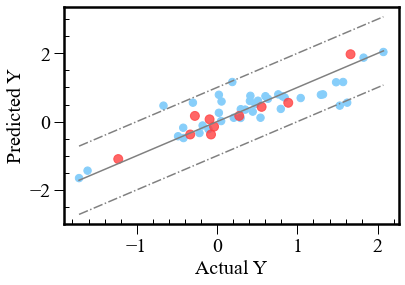

beta coeff std. error is  [0.4544073  0.54658315 0.33115116 0.32403962 0.30863517 0.46700758
 0.47865022 0.51581315 0.33397136]
beta inter std. error is  0.3716481375208748
F values of this model is  13.3796
df of F is v1:9 and v2: 40
F test's P values is  1.4897417743853225e-09


In [63]:
f= ".\\f1_45rmc_csv\\fs9_feature table.csv"
data = pd.read_csv(f)


ydata = data[["pIC50"]]
xdata = data.drop(["pIC50"],axis=1)
model = k_fold(xdata,ydata,run=200,k=5)

### Model 2 with 12 Descriptors:

R^2CV mean: 0.778808
Q^2CV mean: 0.731839
RMSE CV : 0.418941
Model coeff =  [[-3.22611487  2.09915497 -1.28811555 -1.29152793  2.87686699 -0.9013136
  -1.20032373  3.83996701 -0.51690654 -0.42752853 -1.28248694  0.80517787]]
Model intercept =  [0.72413763]


<Figure size 864x576 with 0 Axes>

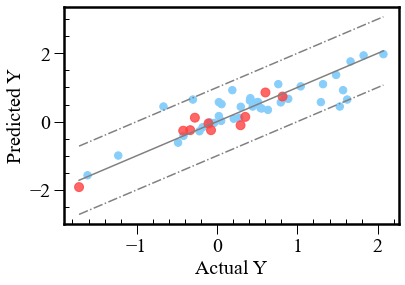

beta coeff std. error is  [0.4741032  0.61211501 0.33411838 0.33861486 0.55326031 0.5759362
 0.46241258 0.53355346 0.26618619 0.35692736 0.3376421  0.37201796]
beta inter std. error is  0.5346685567893842
F values of this model is  10.9202
df of F is v1:12 and v2: 37
F test's P values is  8.161592401911832e-09


In [10]:
f= ".\\f1_45rmc_csv\\fs12_feature table.csv"
data = pd.read_csv(f)

ydata = data[["pIC50"]]
xdata = data.drop(["pIC50"],axis=1)
model = k_fold(xdata,ydata,run=200,k=5)

### Save model:

In [11]:
#save model as data.pickle file:
import pickle
with open('data12.pickle', 'wb') as f:
    pickle.dump(model, f)